In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
day = pd.read_csv(r'C:\Users\moksh\Downloads\day.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
day.size

11680

# Data Cleaning

In [8]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
day.drop("instant", axis=1, inplace=True)
day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [10]:
day.drop("dteday", axis=1, inplace=True)
day.drop("casual", axis=1, inplace=True)
day.drop("registered", axis=1, inplace=True)
day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


Here, I am dropping "instant", "dteday", "casual", and "registered" columns because:
* instant is just a record index which is not necessary as pandas DF has their own index
* dteday values are there in the form of yr, mnth, and weekday. Thus, full date is not necessary. There are only data of 2 years
* casual and registered are there in total count column "cnt". And as per the Model Building, "cnt" should be target variable.

In [11]:
day.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<Figure size 2000x1200 with 0 Axes>

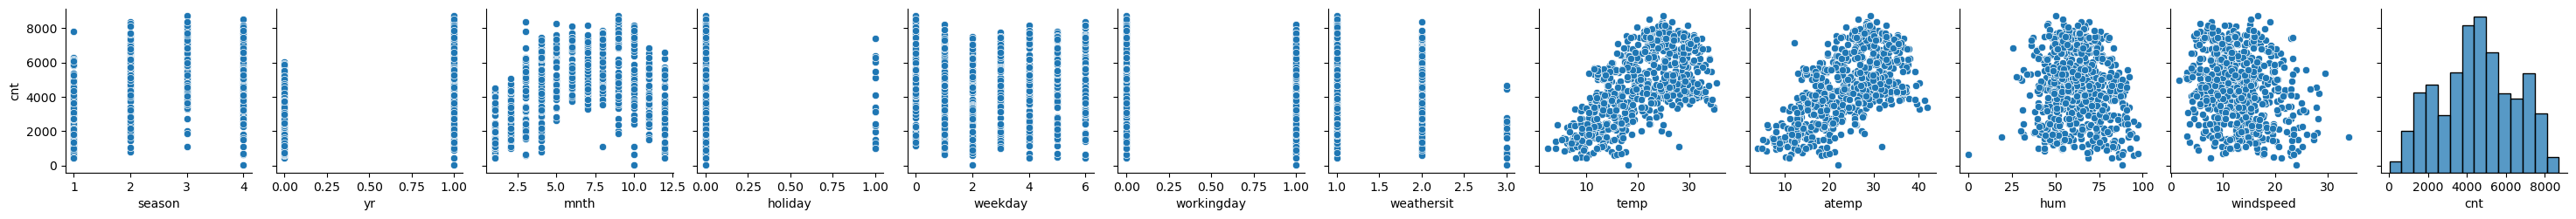

In [12]:
mplt.figure(figsize=(20,12))


sb.pairplot(data=day, y_vars="cnt")
mplt.show()


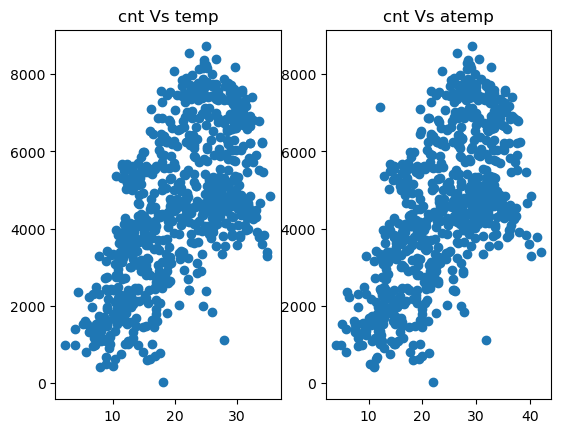

In [13]:

mplt.subplot(1,2,1)
mplt.scatter(x="temp", y="cnt", data=day)
mplt.title("cnt Vs temp")

mplt.subplot(1,2,2)
mplt.scatter(x="atemp", y="cnt", data=day)
mplt.title("cnt Vs atemp")

mplt.show()

There seems to be positive linear relationship between cnt, atemp, and temp

(array([ 13.,  62.,  70.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <BarContainer object of 10 artists>)

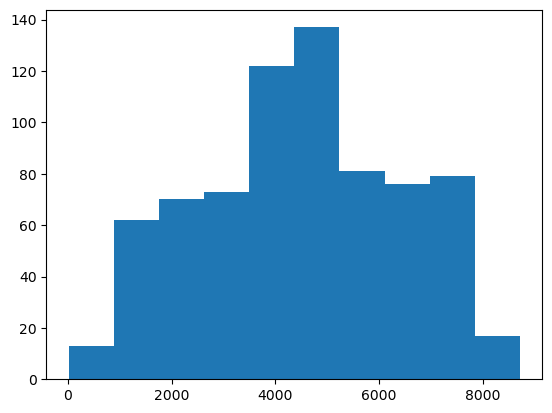

In [14]:
mplt.hist("cnt", data=day)

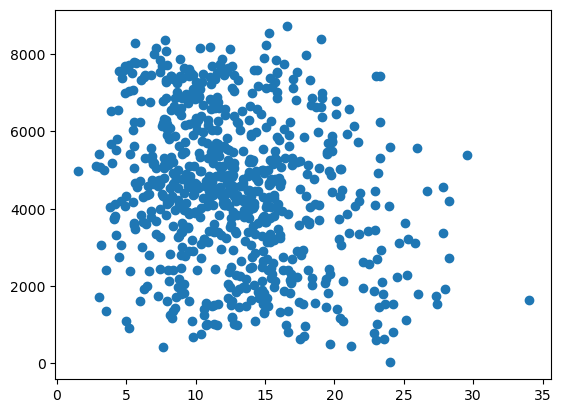

In [15]:
mplt.scatter(x="windspeed", y="cnt", data=day)
mplt.show()

There seems to be negative linear relationship between cnt and windspeed.

# Handling Outliers

In [16]:
day.nunique() #gives info about unique values

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

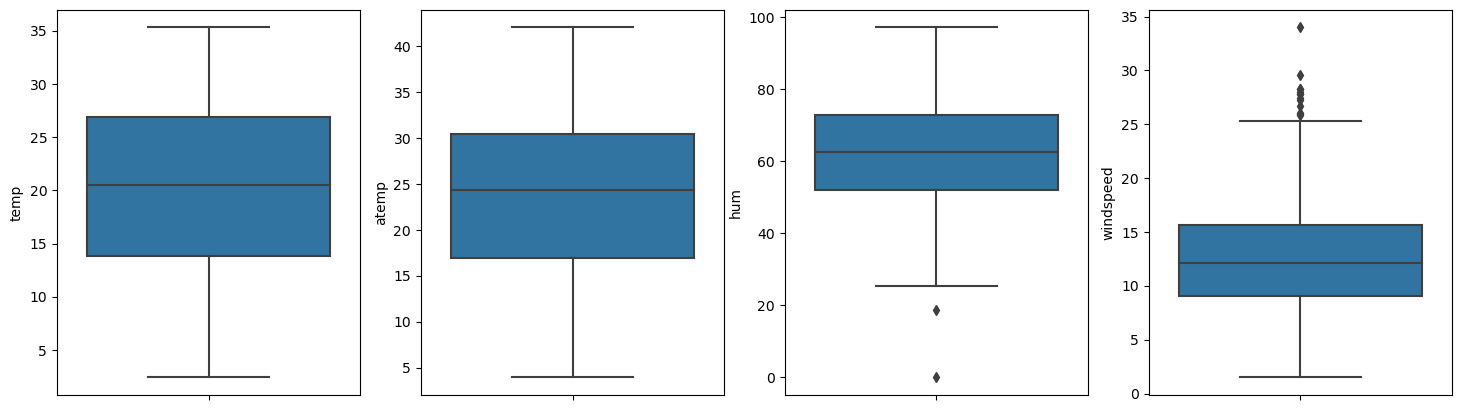

In [17]:
mplt.figure(figsize=(18,5))

mplt.subplot(1,4,1)
sb.boxplot(y="temp", data=day)

mplt.subplot(1,4,2)
sb.boxplot(y="atemp", data=day)

mplt.subplot(1,4,3)
sb.boxplot(y="hum", data=day)

mplt.subplot(1,4,4)
sb.boxplot(y="windspeed", data=day)

mplt.show()

It can be seen here that, there are no outliers.

# EDA

In [18]:
day.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)

day.weathersit.replace({1:"good", 2:"moderate", 3:"bad", 4:"severe"}, inplace=True)

day.mnth.replace({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sept", 
                10:"oct", 11:"nov", 12:"dec"}, inplace=True)

day.weekday.replace({0:"sun", 1:"mon", 2:"tues", 3:"wed", 4:"thur", 5:"fri", 6:"sat"}, inplace=True)

day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,moderate,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,0,moderate,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,moderate,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,1,good,10.489153,11.58500,48.3333,23.500518,1796


<Figure size 3000x3000 with 0 Axes>

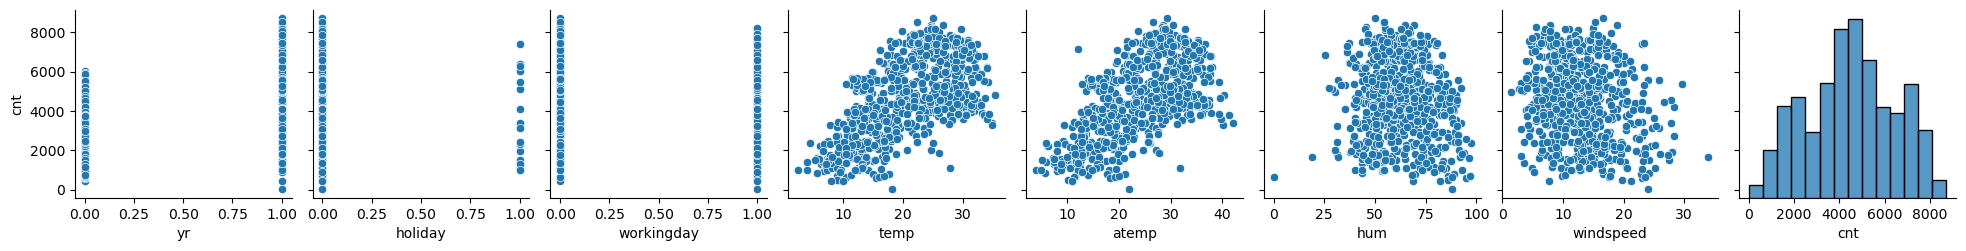

In [19]:
mplt.figure(figsize=(30,30))

sb.pairplot(data=day, y_vars="cnt")
mplt.show()

<Figure size 1800x2000 with 0 Axes>

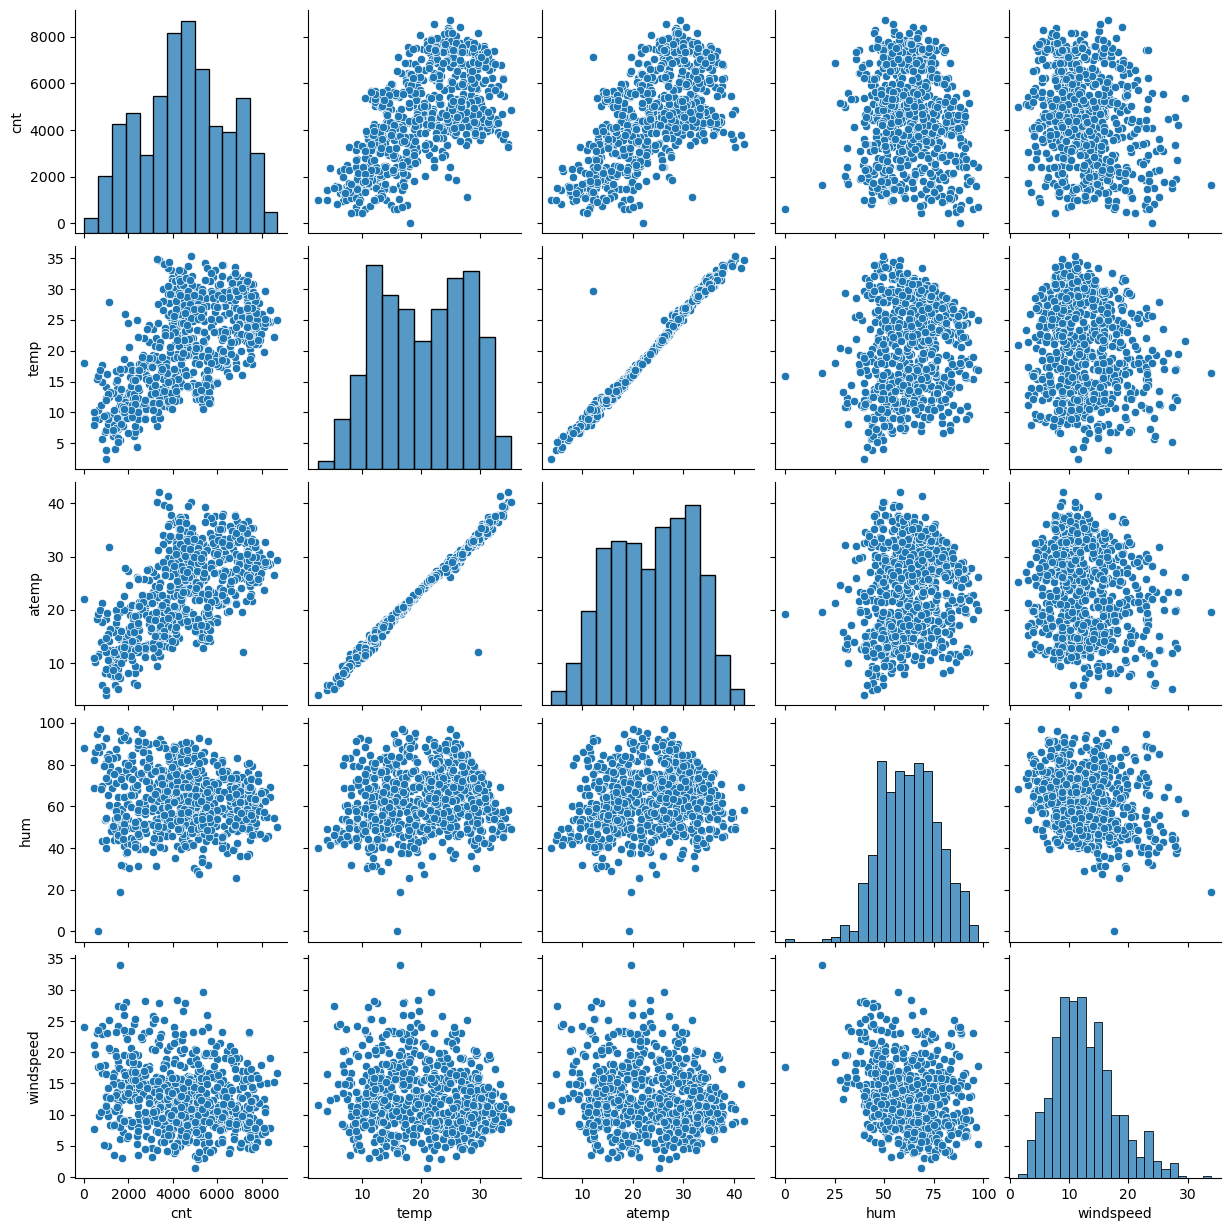

In [20]:
mplt.figure(figsize=(18,20))

sb.pairplot(data=day, vars=("cnt","temp","atemp","hum","windspeed"))
mplt.show()

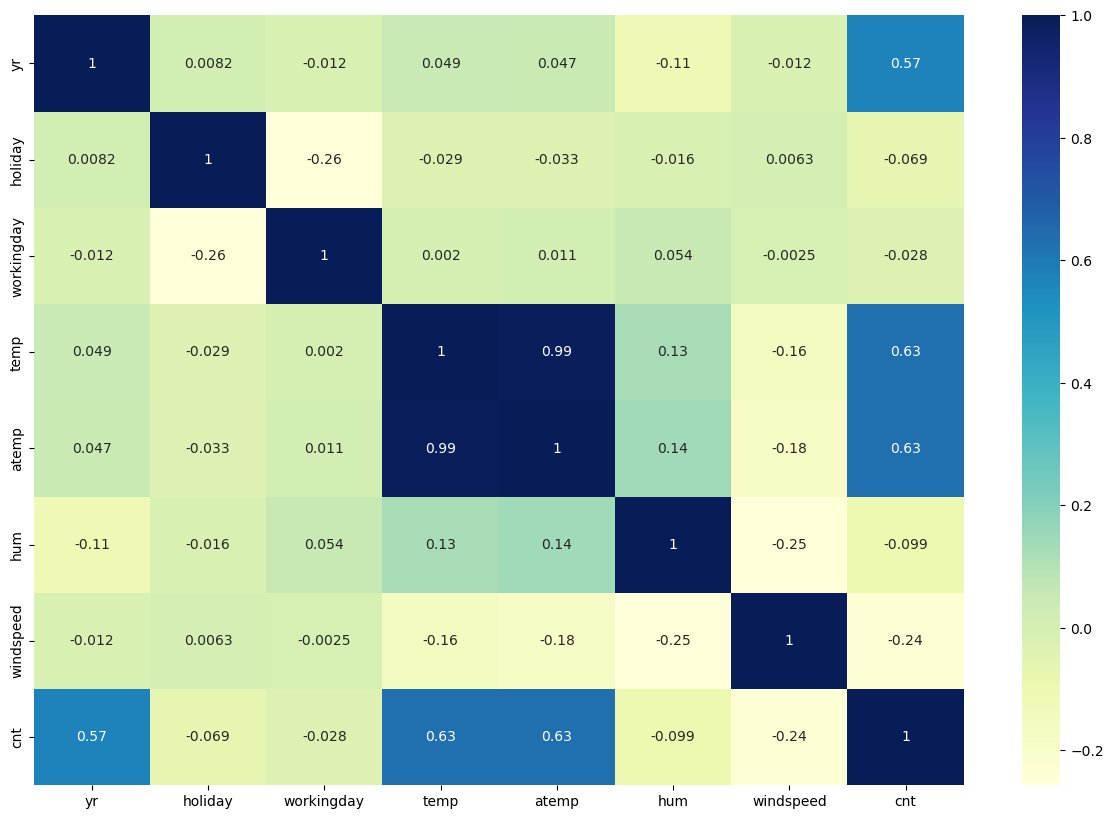

In [21]:
mplt.figure(figsize=(15,10))

sb.heatmap(day.corr(), annot=True, cmap= "YlGnBu")
mplt.show()

# Visualizing Categorical Variables

In [22]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

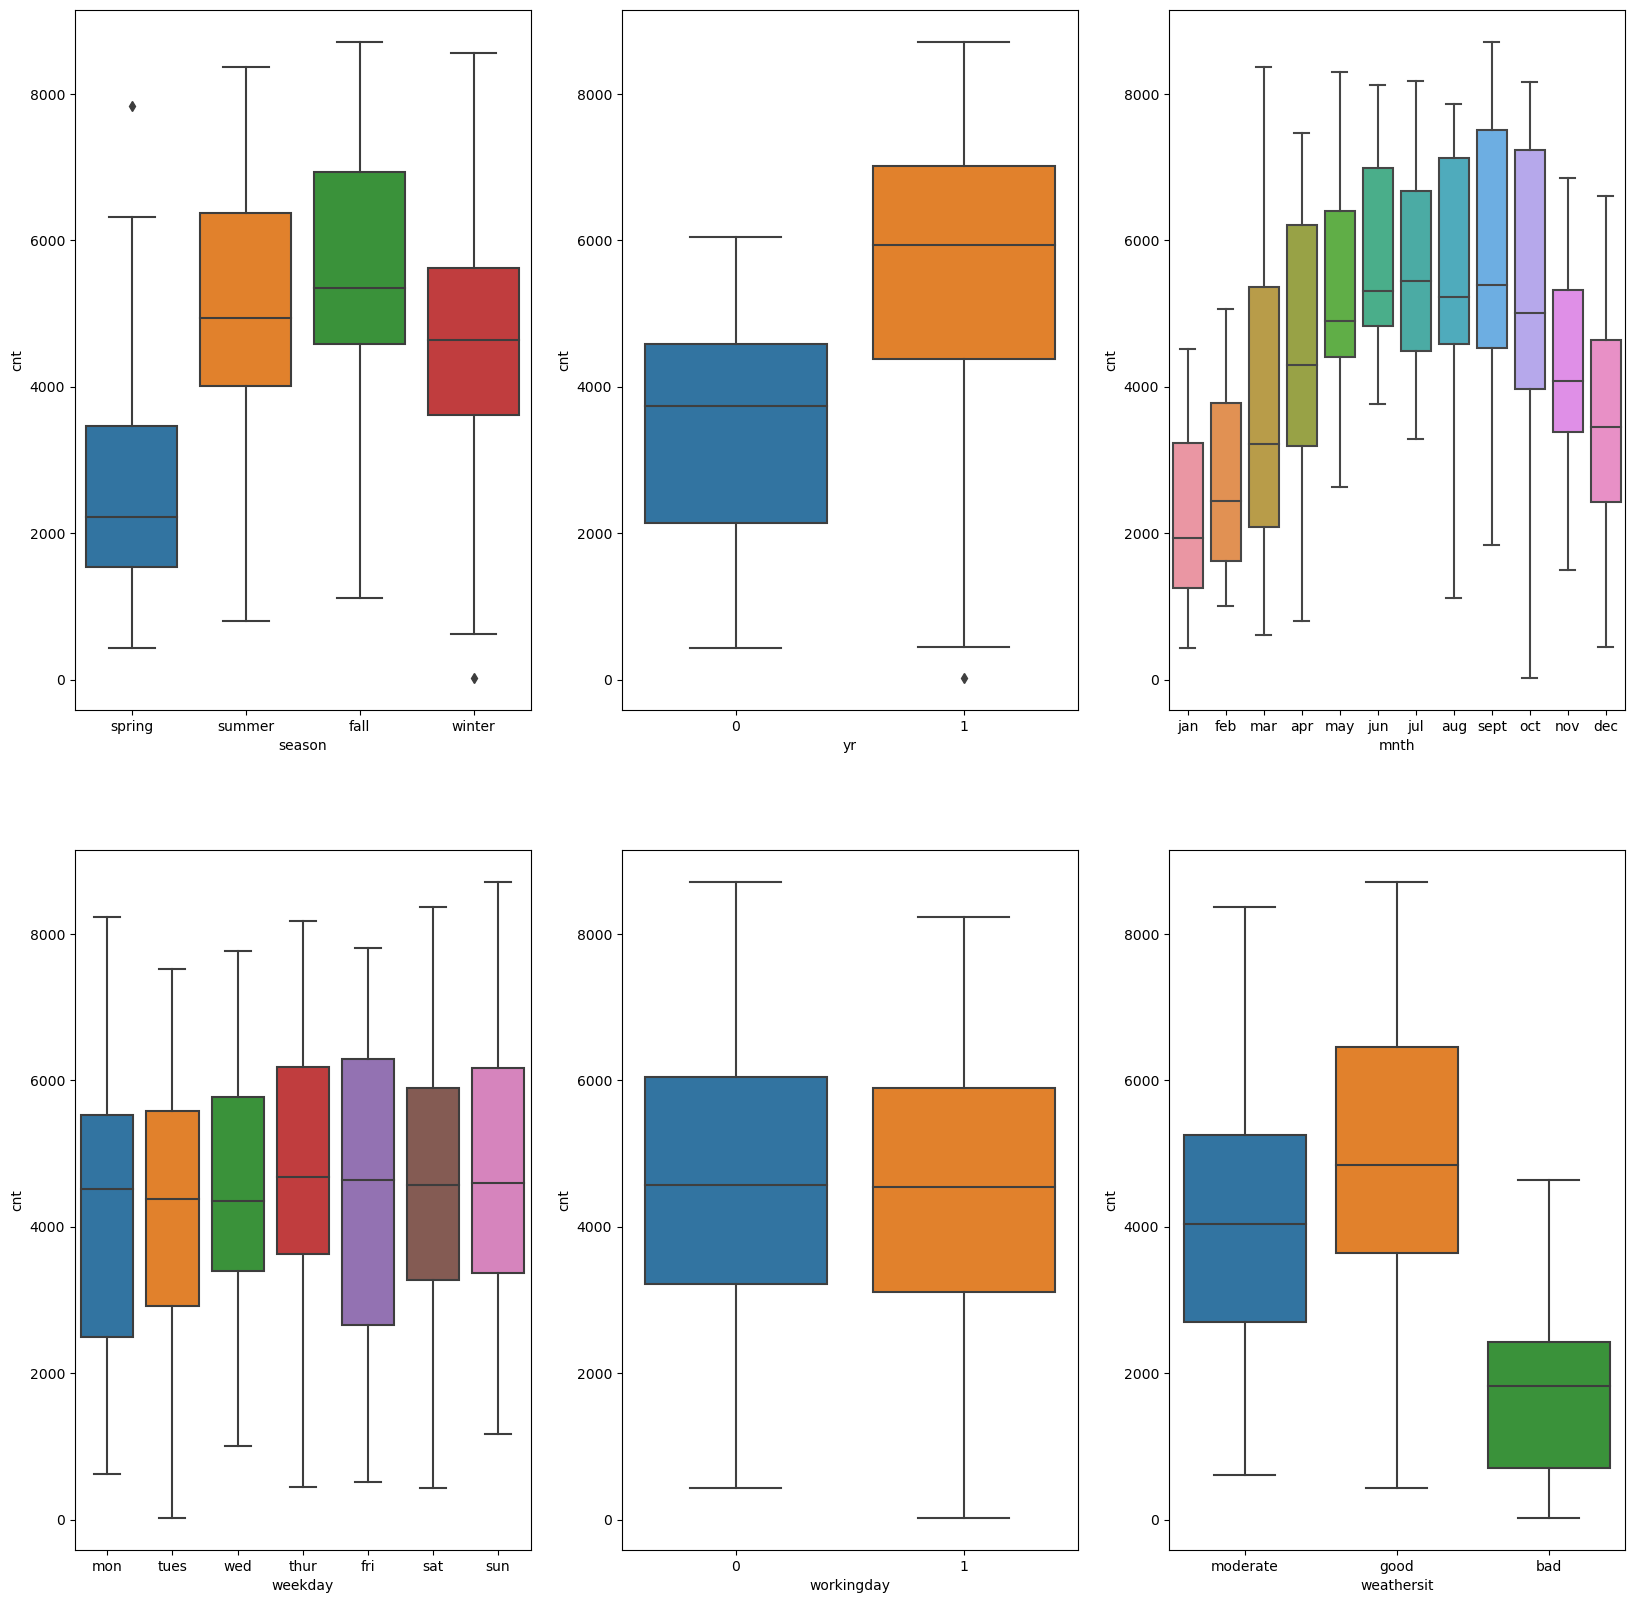

In [23]:
mplt.figure(figsize=(20,20))

mplt.subplot(2,3,1)
sb.boxplot(x="season", y="cnt", data=day)

mplt.subplot(2,3,2)
sb.boxplot(x="yr", y="cnt", data=day)

mplt.subplot(2,3,3)
sb.boxplot(x="mnth", y="cnt", data=day)

mplt.subplot(2,3,4)
sb.boxplot(x="weekday", y="cnt", data=day)

mplt.subplot(2,3,5)
sb.boxplot(x="workingday", y="cnt", data=day)

mplt.subplot(2,3,6)
sb.boxplot(x="weathersit", y="cnt", data=day)

mplt.show()

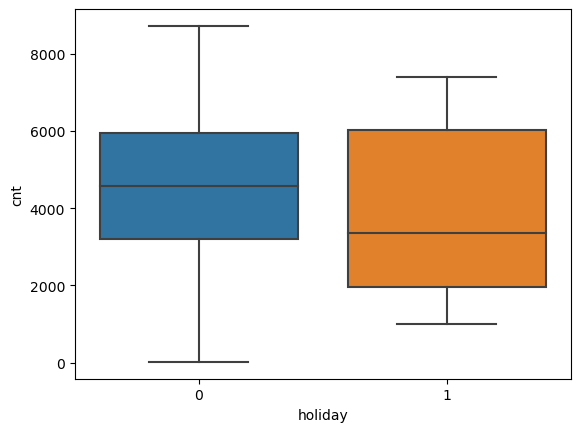

In [24]:
sb.boxplot(x="holiday", y="cnt", data=day)
mplt.show()

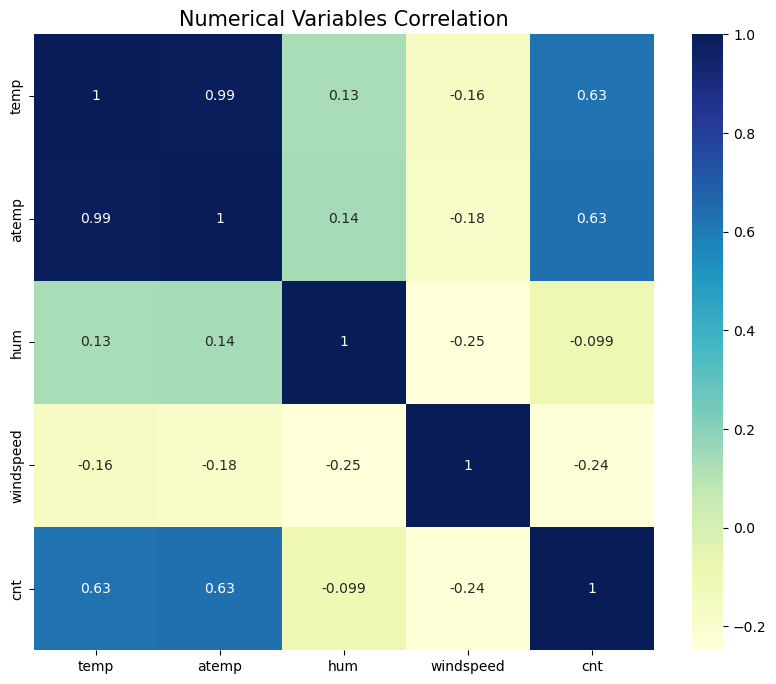

In [25]:
num_var = ["temp","atemp","hum","windspeed","cnt"]

mplt.figure(figsize=(10,8))

sb.heatmap(day[num_var].corr(),annot=True, cmap= "YlGnBu")
mplt.title("Numerical Variables Correlation", fontsize=15)

mplt.show()

In [26]:
day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Data Preparation

In [27]:
day = pd.get_dummies(data=day, columns=["season","mnth","weekday"], drop_first=True)
day = pd.get_dummies(data=day, columns=["weathersit"])
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tues',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [28]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting Data into Train and Test

In [29]:
day.shape

(730, 31)

In [50]:
# y is only target variable
y = day.pop("cnt") 

# X is remaining all variables
X = day

# splitting test and train in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

# here, random_state=42 is used to reproduce the same output as the first time split

In [31]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [51]:
print(X_test.shape)
print(X_train.shape)

(220, 30)
(510, 30)


In [34]:
print(y_test.shape)
print(y_train.shape)

(219,)
(511,)


In [94]:
num_var = ["temp","atemp","hum","windspeed"]

# use MinMax Scaler to rescale the features
scaler = MinMaxScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [53]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.698039,0.551313,0.526919,0.654203,0.415045,0.231373,0.258824,0.24902,...,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.029412,0.625490,0.345098
std,0.500106,0.163554,0.459559,0.227237,0.212992,0.143788,0.185760,0.422124,0.438419,0.43287,...,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tues,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,0,1


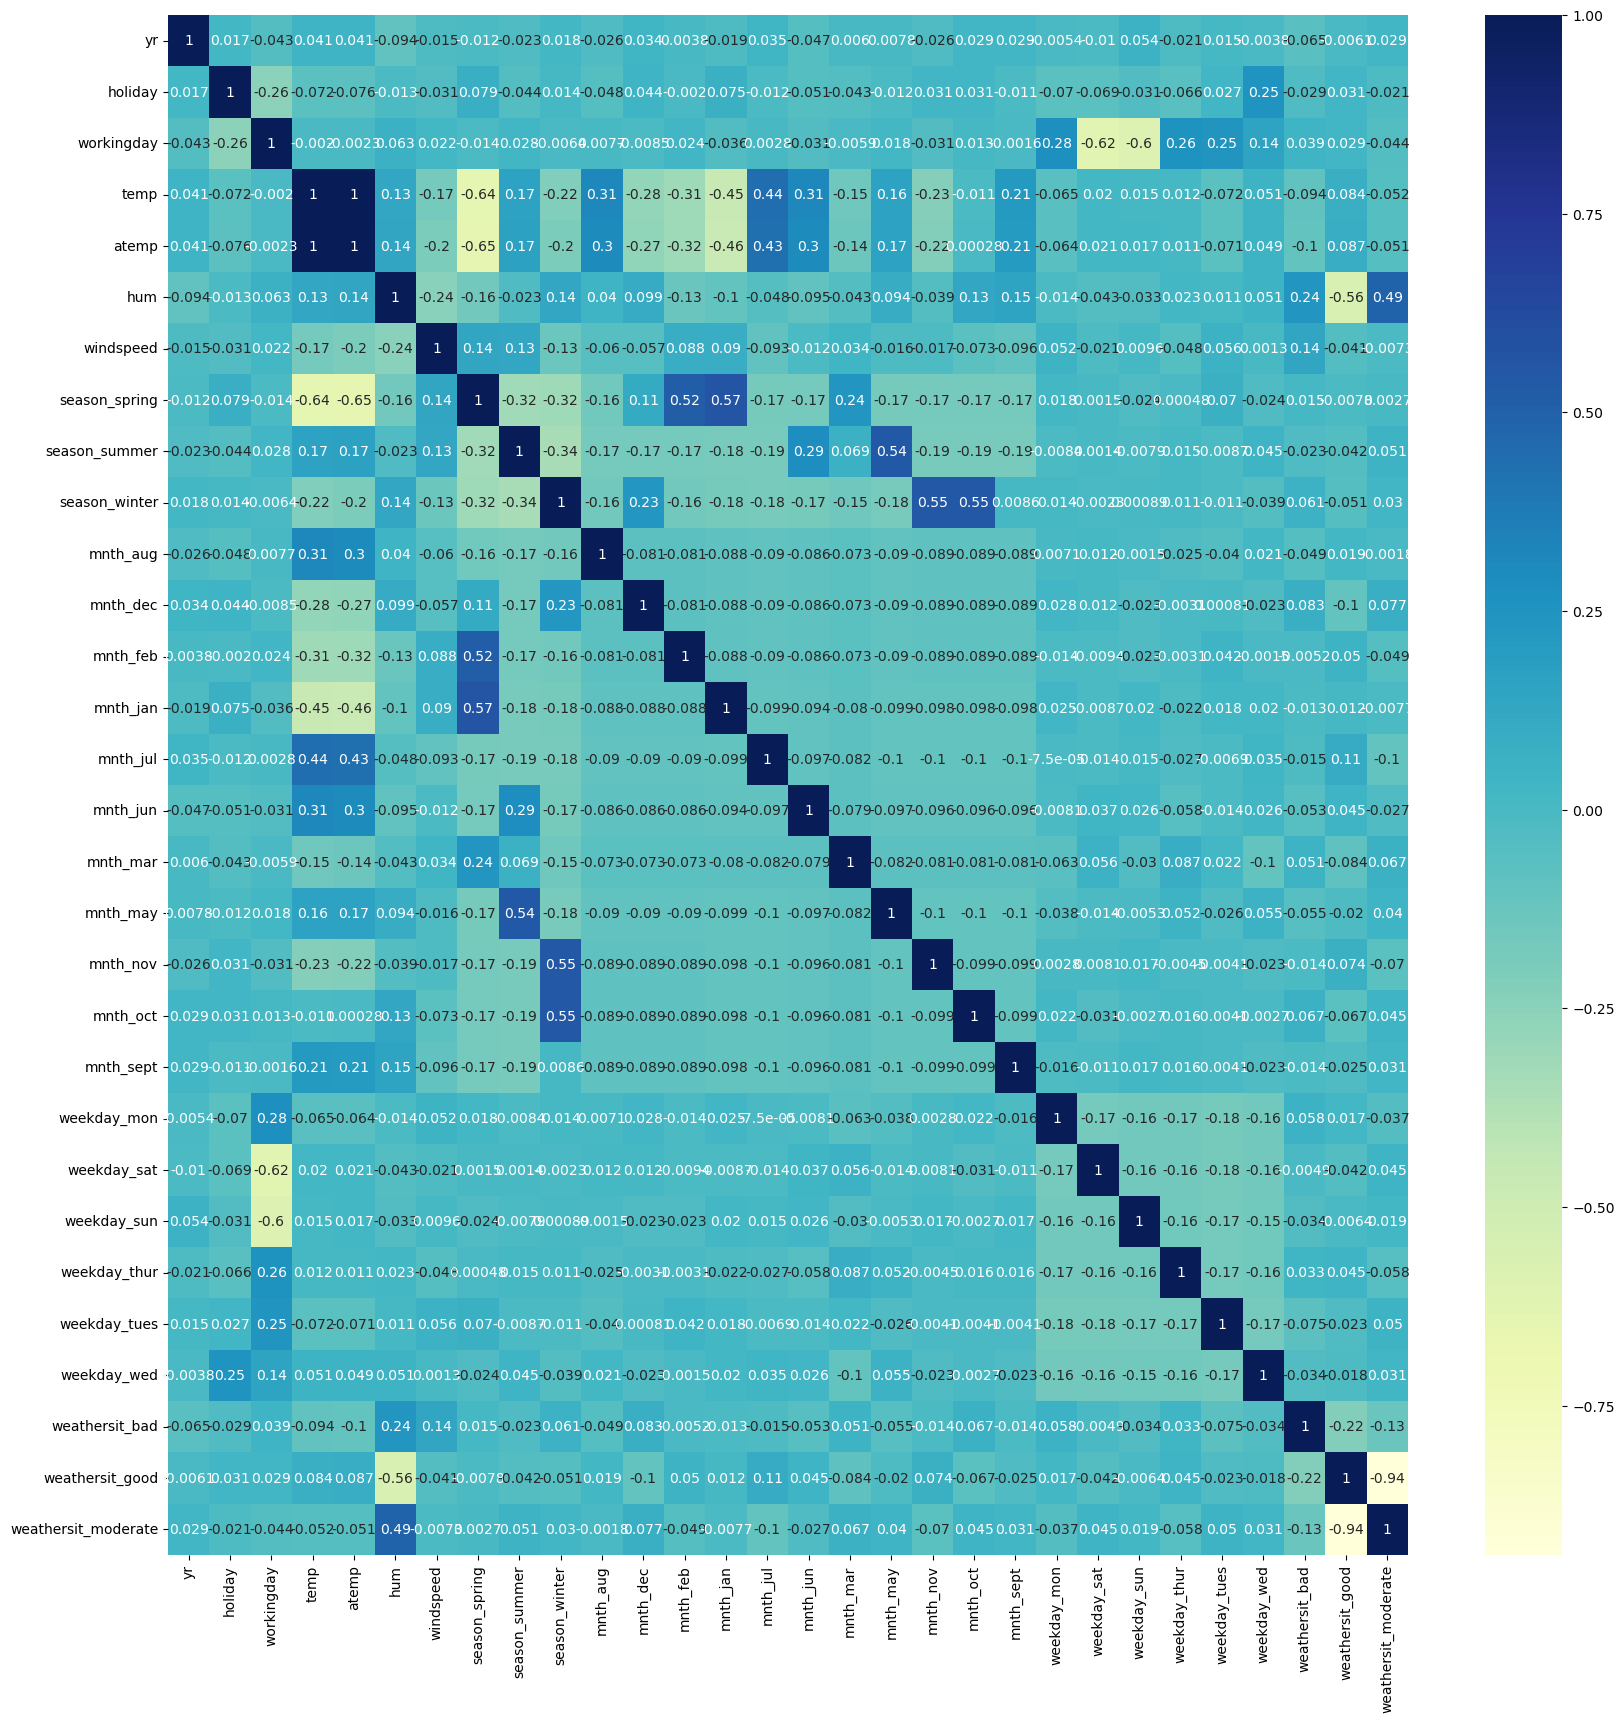

In [54]:
mplt.figure(figsize=(20,20))

sb.heatmap(X_train.corr(),annot=True, cmap= "YlGnBu")
mplt.show()

# Recursive Feature Elimination

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
len(X_train.columns)

30

In [58]:
# selection 15 features by RFE

rfe = RFE(estimator= lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [59]:
# selected columns and their weight

list(zip(X_train.columns, rfe.support_ , rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 14),
 ('weekday_thur', False, 16),
 ('weekday_tues', False, 7),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [60]:
# making a variable of selected columns

X_train.columns[rfe.support_]


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [68]:
# dropping column "atemp" as it is similar to "temp" and taking "weathersit_moderate" as it has higher correlation with "cnt"

X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']]

In [62]:
# checking which features are removed

X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thur', 'weekday_tues', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [63]:
# defining a function to build a model using statsmodel api

def model_build(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr
    

In [64]:
# defining a function to calculate VIF and print them

def cal_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif["Features"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    print(vif.sort_values(by = "VIF", ascending= False))


In [69]:
X_train_rfe.shape

(510, 15)

# Model 1

In [70]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']

model_build(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          2.05e-186
Time:                        21:01:38   Log-Likelihood:                -4117.2
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1862.2544    

# Model 2

In [131]:
# dropping column "weathersit_good" as it has the highest VIF

cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_moderate']

model_build(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          2.05e-186
Time:                        05:04:51   Log-Likelihood:                -4117.2
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3272.7017    

# Model 3

In [132]:
# dropping column "mnth_mar" and "holiday" as it has higher p value

cols = ['yr','temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_moderate']

model_build(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          2.85e-185
Time:                        05:05:26   Log-Likelihood:                -4125.5
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     497   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3331.9433    

# Model 4

In [144]:
# Removing "hum" as it has higher VIF

cols = ['yr','temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_moderate']

model_build(cols)
cal_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          7.38e-183
Time:                        05:10:34   Log-Likelihood:                -4134.0
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     498   BIC:                             8343.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2525.3903    

# Model 5

In [145]:
# Removing "mnth_sept" as it has higher p value

cols5 = ['yr','temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov'
         , 'weathersit_bad', 'weathersit_moderate']

model_build(cols5)
cal_vif(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.2
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          2.00e-182
Time:                        05:11:47   Log-Likelihood:                -4137.9
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     499   BIC:                             8344.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2513.3764    

In this model, VIF is acceptable, p value is 0.00 for all the variables, and R2 score is 0.826. Thus, this model can be accepted

In [146]:
# Build a model with all columns to select features automatically

def build_model_sk(X,y):
    lm1 = LinearRegression()
    lm1.fit(X,y)
    return lm1

In [149]:
# Build final model using above columns in sk learn

lm = build_model_sk(X_train[cols5], y_train)
print(lm.intercept_, lm.coef_)

2513.3764418168103 [ 2009.22366012  3510.90734002  -835.93903733 -1317.8404951
   708.32287006  -639.68237492  -556.00072092  -764.48999618
 -2180.8972677   -678.97538594]


# Residual Analysis

In [150]:
y_train_pred = lm.predict(X_train[cols5])

In [151]:
# histogram of error terms

def resid_plot(act,pred):
    sb.distplot(act-pred)
    mplt.title("Error Terms")
    mplt.xlabel("Errors")

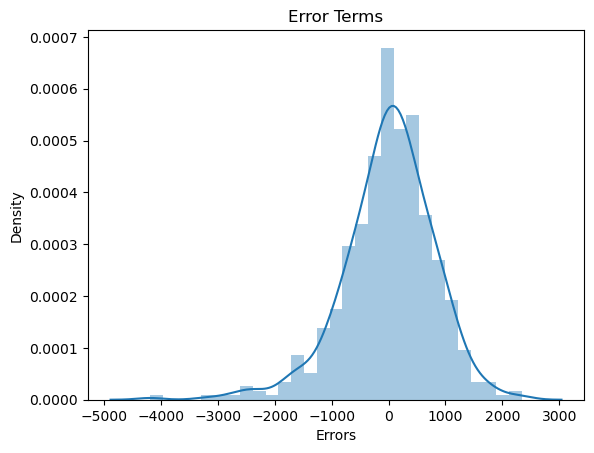

In [152]:
resid_plot(y_train, y_train_pred)

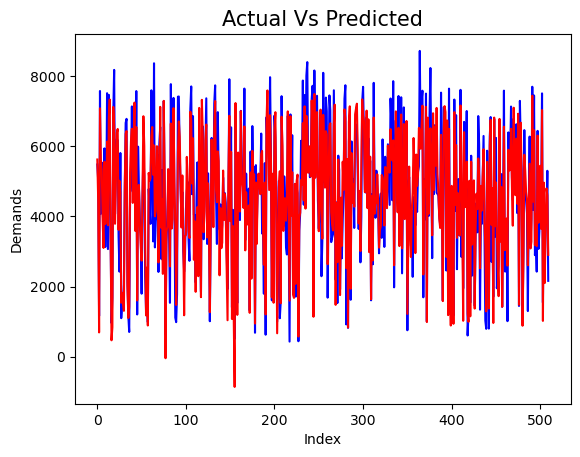

In [153]:
# Actual vs Predicted

c = [i for i in range(0, len(X_train),1)]
mplt.plot(c, y_train, c = "blue")
mplt.plot(c, y_train_pred, c = "red")
mplt.title("Actual Vs Predicted", fontsize=15)
mplt.xlabel("Index")
mplt.ylabel("Demands")
mplt.show()

# Model Prediction and Evaluation

## R Squared Value of Train model

In [154]:
# R squared value

r2_score(y_train,y_train_pred)

0.8261788378869573

## Predicting Values on Test Dataset

In [160]:
num_var = ["temp","atemp","hum","windspeed"]

X_test[num_var] = scaler.transform(X_test[num_var])



In [156]:
cols5 = ['yr','temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov'
         , 'weathersit_bad', 'weathersit_moderate']

# Test Dataset value prediction
y_test_pred = lm.predict(X_test[cols5])

In [161]:
# R squared values for test prediction

r2_score(y_test, y_test_pred)

-1062.4237748297003

In [162]:
# evaluating the model based on r2 scores

y_pred = y_test_pred
r2_score(y_test, y_pred)

-1062.4237748297003

In [157]:
cols5 = ['yr','temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov'
         , 'weathersit_bad', 'weathersit_moderate']

lr = model_build(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.2
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          2.00e-182
Time:                        05:13:20   Log-Likelihood:                -4137.9
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     499   BIC:                             8344.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2513.3764    

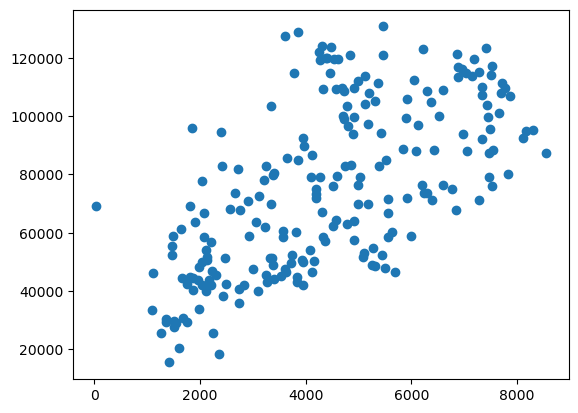

In [159]:
fig = mplt.figure()
mplt.scatter(y_test, y_pred)


# Conclusion:


## Significant variables to predict the demant for bike sharing are:
* Year
* Temperature
* Windspeed
* Season (Spring, Winter)
* Month (July, November, December)
* Weathersit (Light Snow, Mist)